<a href="https://colab.research.google.com/github/goyaljai1/Data_Analysis_Projects/blob/main/Case_Study_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Exploratory Data Analysis on IMDB Dataset

In [1]:
#importing dataset from kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d PromptCloudHQ/imdb-data

  0% 0.00/134k [00:00<?, ?B/s]
100% 134k/134k [00:00<00:00, 97.3MB/s]


In [3]:
!unzip imdb-data.zip

Archive:  imdb-data.zip
  inflating: IMDB-Movie-Data.csv     


In [4]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#loading dataset
df = pd.read_csv("IMDB-Movie-Data.csv")

In [6]:
#top 5 rows
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [7]:
#shape of data
print("Number of Rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Number of Rows: 1000
Number of columns: 12


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


In [9]:
#null values
df.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [10]:
# % missiing values
df.isnull().sum()*100/len(df)

Rank                   0.0
Title                  0.0
Genre                  0.0
Description            0.0
Director               0.0
Actors                 0.0
Year                   0.0
Runtime (Minutes)      0.0
Rating                 0.0
Votes                  0.0
Revenue (Millions)    12.8
Metascore              6.4
dtype: float64

<Axes: >

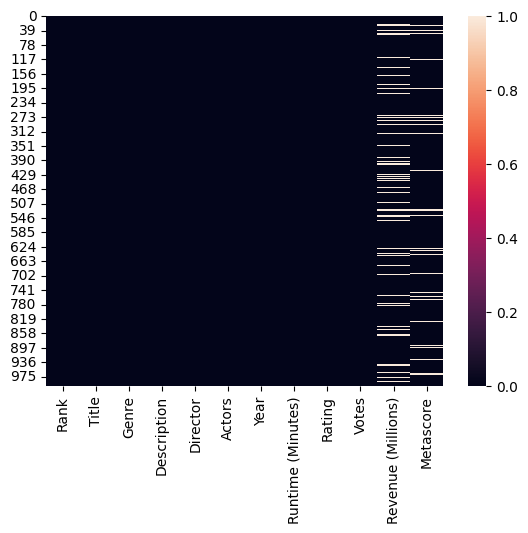

In [11]:
#visaulization of null values
sns.heatmap(df.isnull())

In [12]:
#drop null values

df.dropna(inplace = True)

In [13]:
# check duplicate rows
df.duplicated().any()

False

In [14]:
#Overall statistics
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [15]:
#title of movies having runtime >= 180 minutes
df[df['Runtime (Minutes)']>=180]['Title']

82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
Name: Title, dtype: object

In [16]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [17]:
# in which year there was highest average voting?

df.groupby('Year')['Votes'].mean().sort_values(ascending = False).head(1)

Year
2012    290861.483871
Name: Votes, dtype: float64

Text(0.5, 1.0, 'Votes by Year')

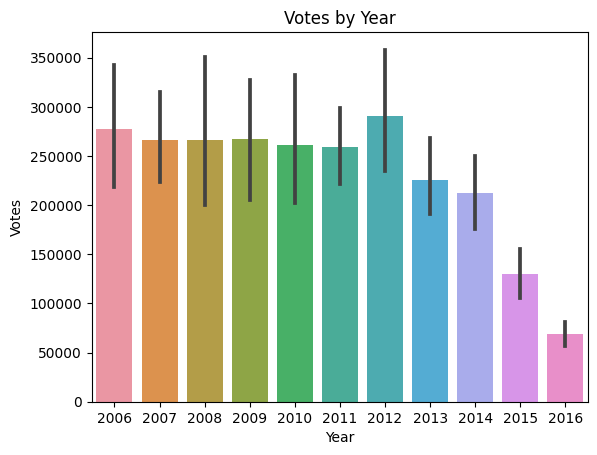

In [18]:
sns.barplot(data = df, x ='Year', y = 'Votes')
plt.title("Votes by Year")

Seaborn autometically performs averaging on the y axis

In [19]:
#Year having highest average revenue

df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending = False).head(1)

Year
2009    115.742
Name: Revenue (Millions), dtype: float64

Text(0.5, 1.0, 'Revenue by Year')

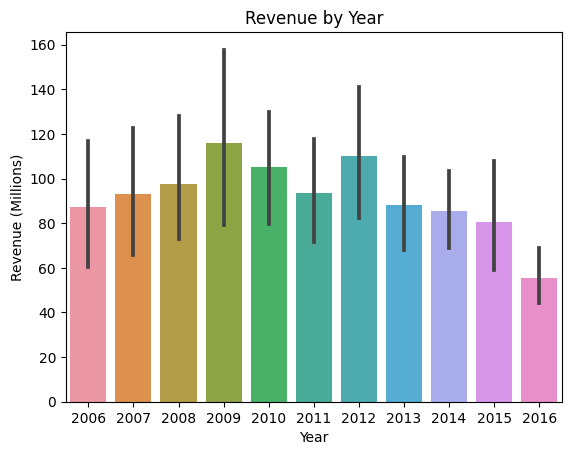

In [20]:
sns.barplot(data = df, x ='Year', y = 'Revenue (Millions)')
plt.title("Revenue by Year")

In [24]:
#average rating for each director
df.groupby('Director')['Rating'].mean().sort_values(ascending = False).head(1)


Director
Christopher Nolan    8.68
Name: Rating, dtype: float64

In [76]:
#Title and runtime of longest movie
print("Title: ", df.sort_values(by = "Runtime (Minutes)", ascending = False)[0:1].Title.to_string()[6:])
print("Runtime: ", df.sort_values(by = "Runtime (Minutes)", ascending = False)[0:1]["Runtime (Minutes)"].to_string()[6:], "minutes")

Title:  The Hateful Eight
Runtime:  187 minutes


<Axes: xlabel='Year', ylabel='count'>

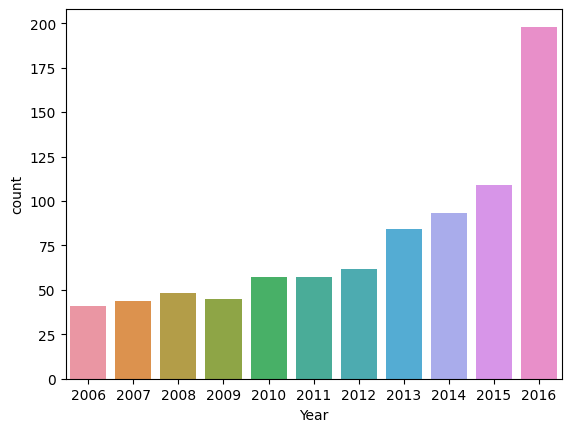

In [85]:
#number of movies per year
sns.countplot(data = df, x = 'Year')

In [96]:
#Movie title of highest grossing movie
df.sort_values(by = "Revenue (Millions)", ascending = False).head(1).Title.to_string()[6:]

'Star Wars: Episode VII - The Force Awakens'

In [97]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [103]:
#top 10 highest rated movie title and director name
df_2 = df.sort_values(by = "Rating", ascending = False).head(10)
df_2.drop(columns = ['Rank', 'Genre', 'Description', 'Actors', 'Year',
       'Runtime (Minutes)', 'Votes', 'Revenue (Millions)',
       'Metascore'], inplace = True)
df_2.reset_index(drop = True)

,Title,Director,Rating
0,The Dark Knight,Christopher Nolan,9.0
1,Inception,Christopher Nolan,8.8
2,Interstellar,Christopher Nolan,8.6
3,The Intouchables,Olivier Nakache,8.6
4,Kimi no na wa,Makoto Shinkai,8.6
5,The Dark Knight Rises,Christopher Nolan,8.5
6,Taare Zameen Par,Aamir Khan,8.5
7,Whiplash,Damien Chazelle,8.5
8,The Departed,Martin Scorsese,8.5
9,The Lives of Others,Florian Henckel von Donnersmarck,8.5


In [105]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

<Axes: xlabel='Rating', ylabel='Revenue (Millions)'>

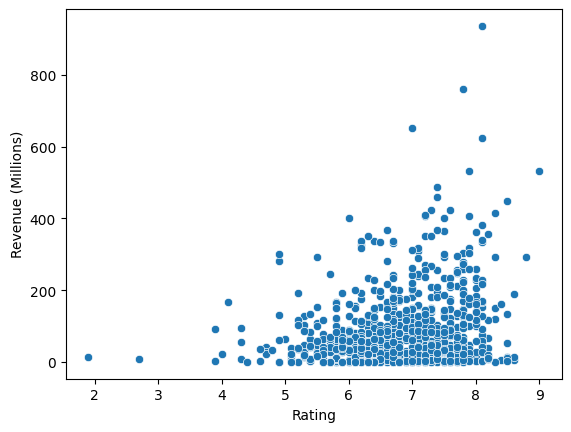

In [106]:
# does rating affect revenue?
sns.scatterplot(x = 'Rating', y = 'Revenue (Millions)', data = df )

In [108]:
#classify movies based on ratings

def rating_classification(rating):
  if rating>= 7:
    return "Excellent"
  elif rating >=5 and rating<7:
    return "Average"
  else:
    return "Bad"

In [109]:
df['Rating_Category'] = df['Rating'].apply(rating_classification)

In [110]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_Category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Average


In [116]:
# total number of action movies
df['Genre'].str.contains("Action").sum()

277

In [ ]:
#differnt genres of movies
lis = []
for value in df['Genre']:
  lis.append(value.split(','))

lis

In [118]:
lis_2 = []
for value in lis:
  for value_2 in value:
    lis_2.append(value_2)
lis_2

['Action',
 'Adventure',
 'Sci-Fi',
 'Adventure',
 'Mystery',
 'Sci-Fi',
 'Horror',
 'Thriller',
 'Animation',
 'Comedy',
 'Family',
 'Action',
 'Adventure',
 'Fantasy',
 'Action',
 'Adventure',
 'Fantasy',
 'Comedy',
 'Drama',
 'Music',
 'Action',
 'Adventure',
 'Biography',
 'Adventure',
 'Drama',
 'Romance',
 'Adventure',
 'Family',
 'Fantasy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Comedy',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Biography',
 'Drama',
 'History',
 'Action',
 'Thriller',
 'Biography',
 'Drama',
 'Drama',
 'Mystery',
 'Sci-Fi',
 'Adventure',
 'Drama',
 'Thriller',
 'Drama',
 'Animation',
 'Adventure',
 'Comedy',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Comedy',
 'Action',
 'Adventure',
 'Drama',
 'Comedy',
 'Drama',
 'Thriller',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Comedy',
 'Action',
 'Horror',
 'Sci-Fi',
 'Action',
 'Adventure',
 'Sci-Fi',
 'Advent

In [119]:
set(lis_2)

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [125]:
#number of movies of each genre
from collections import Counter
Counter(lis_2)

Counter({'Action': 277,
         'Adventure': 244,
         'Sci-Fi': 107,
         'Mystery': 86,
         'Horror': 87,
         'Thriller': 148,
         'Animation': 45,
         'Comedy': 250,
         'Family': 48,
         'Fantasy': 92,
         'Drama': 419,
         'Music': 15,
         'Biography': 67,
         'Romance': 120,
         'History': 25,
         'Western': 4,
         'Crime': 126,
         'War': 10,
         'Musical': 5,
         'Sport': 15})